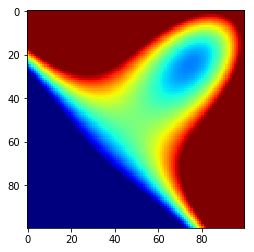

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sz = 100
x,y = np.meshgrid(np.linspace(-2,2,sz),np.linspace(2,-2,sz))

z = x*x*x + y*y*y - 3*x*y

plt.imshow( z, vmin=-2, vmax=2,  cmap='jet')

[ 0.  1.]

[ 0.  1.  2.  3.  4.]

[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]

[[ 0.  0.]
 [ 1.  1.]
 [ 2.  2.]
 [ 3.  3.]
 [ 4.  4.]]


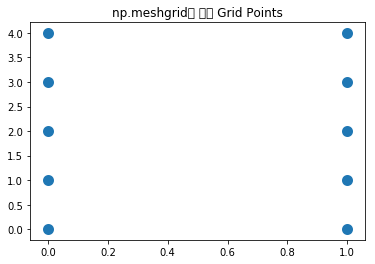

In [15]:
nx, ny = 2, 5
x = np.linspace(0, 1, nx)
y = np.linspace(0, 4, ny)
xv, yv = np.meshgrid(x, y)
print(x, y, xv, yv, sep='\n\n')

#linspace는 정한 구간 안에서 선형 배열 생성
#meshgrid는 그리드 포인트를 생성
#ex) x, y라는 두 변수를 가진 함수에서 x가 0~1까지, y가 0~4까지의 사각형 영역에서
#    변화하는 과정을 보고싶다면, 이 사각형 영역 안의 다음과 같은 그리드 포인트들에
#    대해 함수를 계산해야 한다.
#(x, y) = (0, 0), (0, 1), (0, 2), ... , (1, 2), (1, 3), (1, 4)
#https://datascienceschool.net/view-notebook/17608f897087478bbeac096438c716f6/
#meshgrid 함수는 사각형 영역을 구성하는 가로축의 점들과 세로축의 점을 나타내는 두 벡터를 인수로 받음.
#사각형의 영역을 이루는 조합을 
#1) 그리드 포인트의 X 좌표 값만을 표시하는 행렬과, 2) Y 좌표 값만을 표시하는 행렬 두 개로 분리해서 출력

plt.title("np.meshgrid로 만든 Grid Points")
plt.scatter(xv, yv, linewidths=5)
plt.show()

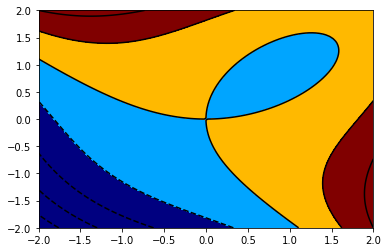

In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sz = 100
x,y = np.meshgrid(np.linspace(-2,2,sz),np.linspace(2,-2,sz))

z = x*x*x + y*y*y - 3*x*y

plt.contourf(x,y,z, vmin=-7, vmax=7, cmap='jet')
plt.contour(x,y,z,colors='black')
#plt.show()

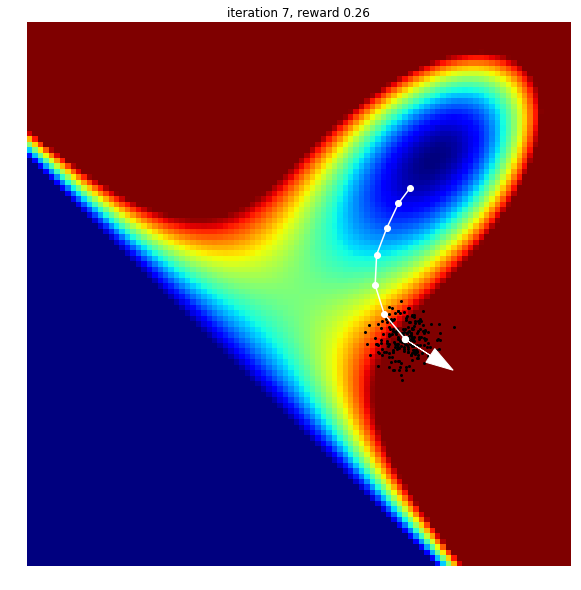

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


sz = 100
x,y = np.meshgrid(np.linspace(-2,2,sz),np.linspace(2,-2,sz))
# 넘파이 매쉬그리드는 엑스축으로 먼저, 와이축으로 다음 
# 행렬의 크기 순서와 mashgrid랑 차이남 

Z = x*x*x + y*y*y - 3*x*y

# plt.imshow( z, vmin=-1, vmax=1, cmap='jet')

from IPython.display import clear_output
import time


np.random.seed(3)
nn = 7 # number of steps to take (and plot horizontally)
alpha = 0.03 # learning rate
sigma = 3 # standard deviation of the samples around current parameter vector

w = np.array([70.0, 30.0]) 
# start point : size=100 이므로 가로x 먼저  세로y 다음 

#plt.ion()       # something about plotting
#plt.figure(figsize=(10,7))
#plt.figure(figsize=(20,15))

prevx, prevy = [], []

for q in range(nn):
    
    plt.figure(figsize=(10,10))
    # draw the optimization landscape
    #ax1 = plt.subplot(1,nn,q+1)
  
    plt.imshow(Z, vmin=-1, vmax=1, cmap='jet')
    # draw a population of samples in black
         
    noise = np.random.randn(200, 2)
    wp = np.expand_dims(w, 0) + sigma*noise
    x,y = zip(*wp)
 
    plt.scatter(x,y,4,'k', edgecolors='face')

    # draw the current parameter vector in white
    plt.scatter( [w[0]],[w[1]], 40,'w', edgecolors='face')

    # draw estimated gradient as white arrow
    R = np.array(  [  Z[ int(wi[1]), int(wi[0]) ]  for wi in wp ]  )
    R -= R.mean()
    R /= R.std() # standardize the rewards to be N(0,1) gaussian
    g = np.dot(R, noise)
    u = alpha * g
    plt.arrow( w[0], w[1], u[0], u[1], head_width=3, head_length=5, fc='w', ec='w')
    
    plt.axis('off')
    plt.title('iteration %d, reward %.2f' % (q+1, Z[int(w[0]), int(w[1])]))
    
    # draw the history of optimization as a white line
    prevx.append(w[0])
    prevy.append(w[1])
    
    if len(prevx) > 0:
        plt.plot(prevx, prevy, 'wo-')
    
    
    w += u
    #plt.axis('tight')
    plt.pause(1.0)
    #time.sleep(1.0)
    clear_output(wait=True)

1
[[ 68.11934476  35.18267427]
 [ 71.64611938  30.20444956]
 [ 68.56140143  35.29279696]
 [ 73.43461965  33.61275502]
 [ 66.2276735   30.7771846 ]
 [ 66.77986246  30.89022296]
 [ 70.33179219  36.05390073]
 [ 70.02675511  36.4225423 ]
 [ 66.49087903  33.98698874]
 [ 66.69819512  32.97695963]
 [ 71.52714187  32.75677763]
 [ 62.25776725  32.0875356 ]
 [ 65.71363526  28.31923221]
 [ 65.48108758  35.72785798]
 [ 72.89491659  31.37896544]
 [ 70.85979216  36.38064987]
 [ 64.37280784  32.72789545]
 [ 67.71880413  33.3631406 ]
 [ 63.07093221  31.79855685]
 [ 71.02564827  36.63259316]
 [ 73.34627089  31.83345643]
 [ 73.46070731  34.8436989 ]
 [ 63.77458114  35.13081141]
 [ 66.79534454  34.40321236]
 [ 67.54461282  36.47069949]
 [ 68.62186512  31.99846851]
 [ 70.74708195  33.6146489 ]
 [ 66.61331544  36.67780665]
 [ 66.62714892  30.93457898]
 [ 66.23346081  28.4495673 ]
 [ 66.19256314  38.42861664]
 [ 65.12733284  32.87124028]
 [ 64.5276346   31.01192411]
 [ 72.40826112  35.53505077]
 [ 66.021433

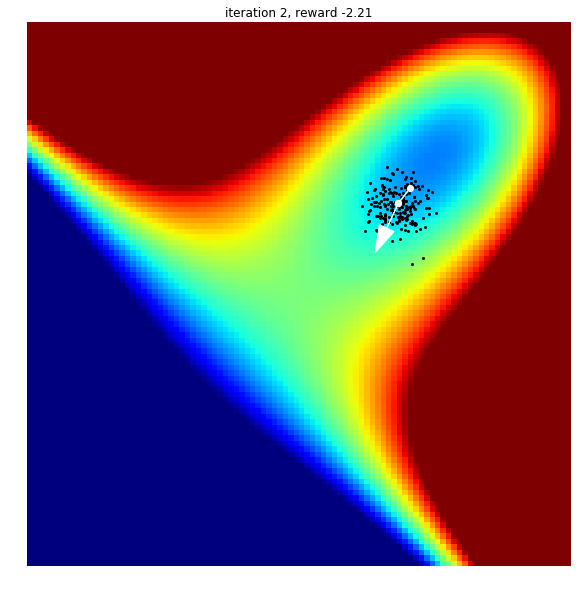

In [41]:
sz = 100
x,y = np.meshgrid(np.linspace(-2,2,sz),np.linspace(2,-2,sz))
# 넘파이 매쉬그리드는 엑스축으로 먼저, 와이축으로 다음 
# 행렬의 크기 순서와 mashgrid랑 차이남 

Z = x*x*x + y*y*y - 3*x*y

np.random.seed(3)
nn = 7 # number of steps to take (and plot horizontally)
alpha = 0.03 # learning rate
sigma = 3 # standard deviation of the samples around current parameter vector

w = np.array([70.0, 30.0]) 
# start point : size=100 이므로 가로x 먼저  세로y 다음 

print(w, type(w))

prevx, prevy = [], []

for q in range (2):
    print(q)
    plt.figure(figsize=(10,10))
    # draw the optimization landscape
    #ax1 = plt.subplot(1,nn,q+1)
  
    plt.imshow(Z, vmin=-2, vmax=2, cmap='jet')
    # draw a population of samples in black
         
    noise = np.random.randn(200, 2)
    #randn은 기댓값은 0, 표준 편차는 1인 가우시안 표준 정규 분포를 따르는 난수 두 개씩을 200개의 배열로 생성
    
    wp = np.expand_dims(w, 0) + sigma*noise
    #expand_dims()는 차원을 늘리는 함수이며, squeeze()는 차원을 줄이는 함수
    #https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221164750517&proxyReferer=https%3A%2F%2Fwww.google.com%2F
    #
    print(wp)
    x,y = zip(*wp)
 
    plt.scatter(x,y,4,'k', edgecolors='face')

    # draw the current parameter vector in white
    plt.scatter( [w[0]],[w[1]], 40,'w', edgecolors='face')

    # draw estimated gradient as white arrow
    R = np.array(  [  Z[ int(wi[1]), int(wi[0]) ]  for wi in wp ]  )
    R -= R.mean()
    R /= R.std() # standardize the rewards to be N(0,1) gaussian
    g = np.dot(R, noise)
    u = alpha * g
    plt.arrow( w[0], w[1], u[0], u[1], head_width=3, head_length=5, fc='w', ec='w')
    
    plt.axis('off')
    plt.title('iteration %d, reward %.2f' % (q+1, Z[int(w[0]), int(w[1])]))
    
    # draw the history of optimization as a white line
    prevx.append(w[0])
    prevy.append(w[1])
    
    if len(prevx) > 0:
        plt.plot(prevx, prevy, 'wo-')
    
    
    w += u
    #plt.axis('tight')
    plt.pause(1.0)
    #time.sleep(1.0)
    clear_output(wait=True)